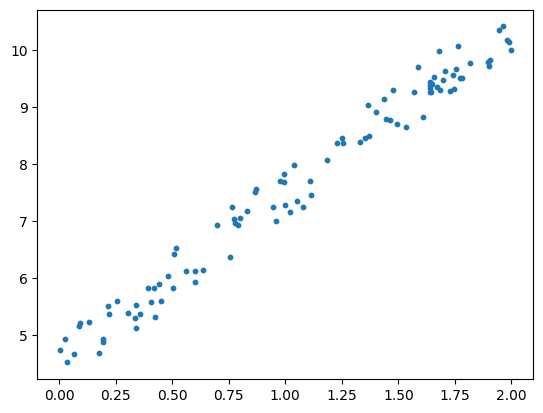

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X,y,s=10)
plt.show()

In [2]:
#implementing the normal equation
# (Xt * X)^-1 * Xt * y
X_b = np.c_[np.ones((100,1)),X]
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.         1.68285923]
 [1.         0.1739856 ]
 [1.         0.83131056]
 [1.         0.40601043]
 [1.         0.50820097]
 [1.         0.19179621]
 [1.         1.75577714]
 [1.         1.3531174 ]
 [1.         0.45172442]
 [1.         1.6078283 ]
 [1.         1.49463774]
 [1.         1.36700184]
 [1.         1.22750388]
 [1.         1.56758566]
 [1.         1.99124297]
 [1.         1.78251457]
 [1.         1.70730839]
 [1.         1.43451903]
 [1.         1.4466387 ]
 [1.         0.34017839]
 [1.         1.90392868]
 [1.         1.64925596]
 [1.         0.4818306 ]
 [1.         0.51565517]
 [1.         1.65771197]
 [1.         1.25120251]
 [1.         0.03270027]
 [1.         1.63850109]
 [1.         0.94539739]
 [1.         0.79849539]
 [1.         1.81659563]
 [1.         1.18517288]
 [1.         1.74139819]
 [1.         0.08961614]
 [1.         0.19159187]
 [1.         0.22005539]
 [1.         1.5857627 ]
 [1.         0.440099  ]
 [1.         0.42574022]
 [1.         1.25484807]


In [3]:
theta_best

array([[4.60670478],
       [2.87134363]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #add x0 = 1
X_new_b

array([[1., 0.],
       [1., 2.]])

In [5]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.60670478],
       [10.34939204]])

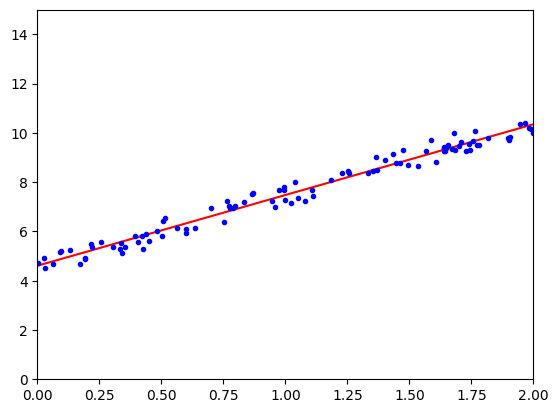

In [6]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
#same thing but using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.60670478]), array([[2.87134363]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.60670478],
       [10.34939204]])

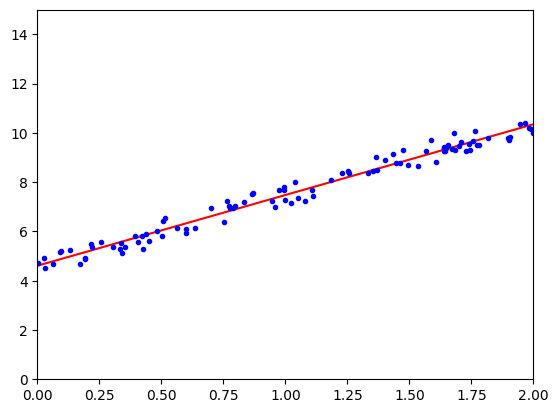

In [9]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

#batch gradient descent
for interation in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.60670478],
       [2.87134363]])

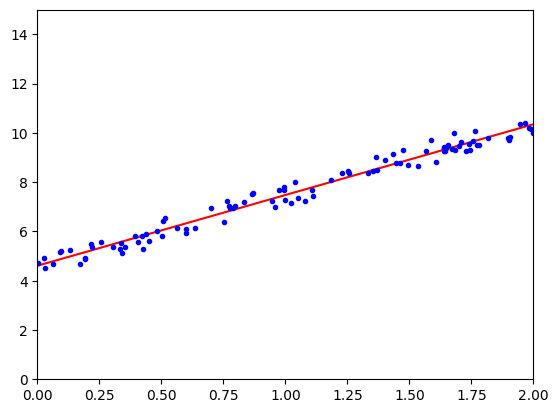

In [11]:
y_predict = X_new_b.dot(theta)
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [12]:
#stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [13]:
theta

array([[4.61950121],
       [2.86509089]])

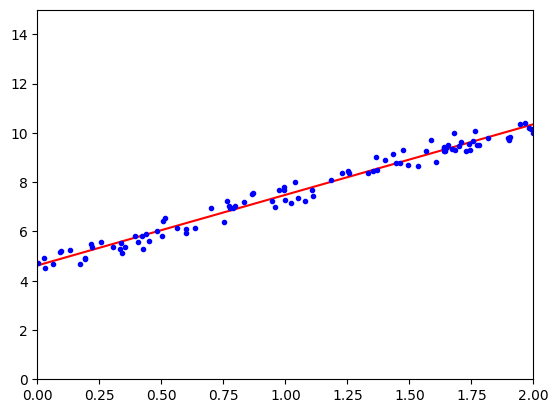

In [14]:
y_predict = X_new_b.dot(theta)
y_predict

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [15]:
#simple stochastic gradient descent using scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.60505138]), array([2.89807404]))

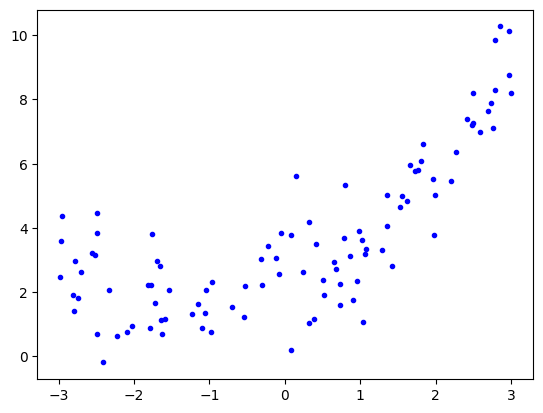

In [17]:
#polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,'b.')
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.55781915])

In [19]:
X_poly[0]

array([1.55781915, 2.4268005 ])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.17016217]), array([[0.99280663, 0.42491451]]))

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

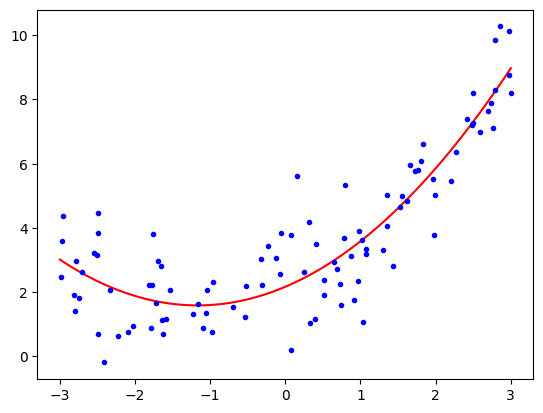

In [27]:
plt.plot(X_new,y_pred,'r-')
plt.plot(X,y,'b.')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.ylim(0,3)

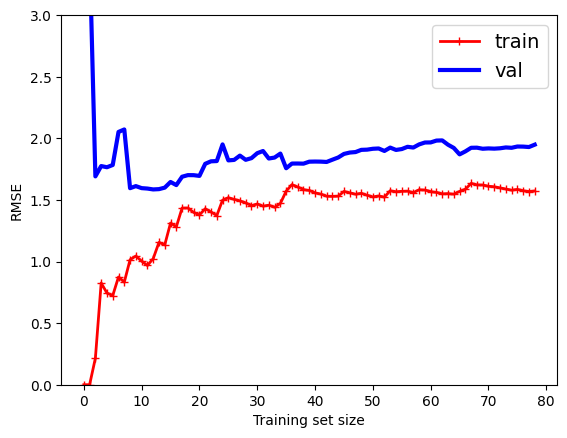

In [30]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

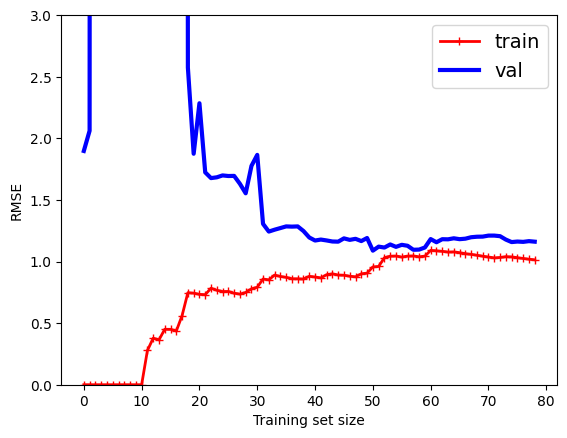

In [31]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [33]:
X = iris['data'][:,3:] #petal width
y = (iris['target'] == 2).astype(int) #1 if IRis-Virginica else 0

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

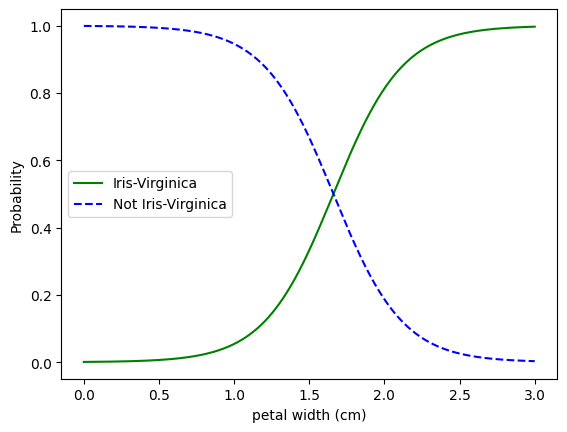

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='center left')

In [36]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [37]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10)

In [38]:
softmax_reg.predict([[5, 2]])

array([2])

In [39]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])

In [40]:
#exercise # 12
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [43]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]
X_with_bias[:5]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2]])

In [44]:
np.random.seed(2042)

In [45]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [46]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [47]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [48]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [49]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [50]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps,axis=1,keepdims=True)
    return exps / exp_sums

In [51]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [63]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon),axis=1))
        print(iteration,loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 3.0091266171204514
500 0.547833059662997
1000 0.5074749215073897
1500 0.4770706035589375
2000 0.45294212116515814
2500 0.4330611060552481
3000 0.41621414689818376
3500 0.40162792587189283
4000 0.388784141289196
4500 0.3773209157004912
5000 0.3669769024738914


In [73]:
Theta

array([[ 3.31796711, -1.4140501 , -3.60418817],
       [-1.68206755,  0.02521979, -0.33977727],
       [-0.69980152, -0.63975003,  1.88097348]])

In [74]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [75]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 4.389185406058857
500 0.53836117830737
1000 0.5050554328025818
1500 0.4952027953987743
2000 0.49150274878320543
2500 0.4899862970299706
3000 0.4893369827424235
3500 0.4890519457995903
4000 0.48892490834158653
4500 0.48886774370206154
5000 0.4888418603213463


In [76]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [77]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.3755884956240954
500 0.5627674606315182
1000 0.540714832025482
1500 0.5347656233599178
2000 0.5329764591321045
2500 0.5325609042775665
2660 0.53254490344791
2661 0.5325449042485811 early stopping!


In [78]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

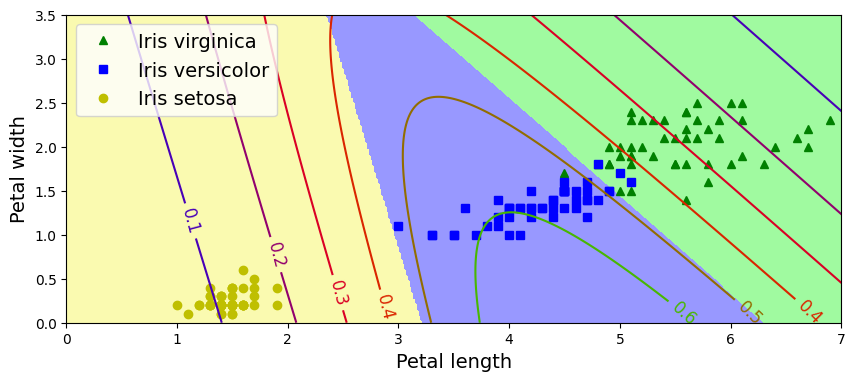

In [80]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [81]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333